In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("task1Dataset/API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv", skiprows = 4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [32]:
df_2020 = df.iloc[:, [0,63]].dropna()
df_2020.columns = ["Country Name", "Population"]

non_countries = ["World", "High income", "Low income", "Middle income", "European Union"]
df_2020 = df_2020[~df_2020["Country Name"].isin(non_countries)]
df_2020.head()

,Country Name,Population
0,Aruba,109203.0
1,Africa Eastern and Southern,675950189.0
2,Afghanistan,37856121.0
3,Africa Western and Central,463365429.0
4,Angola,32375632.0


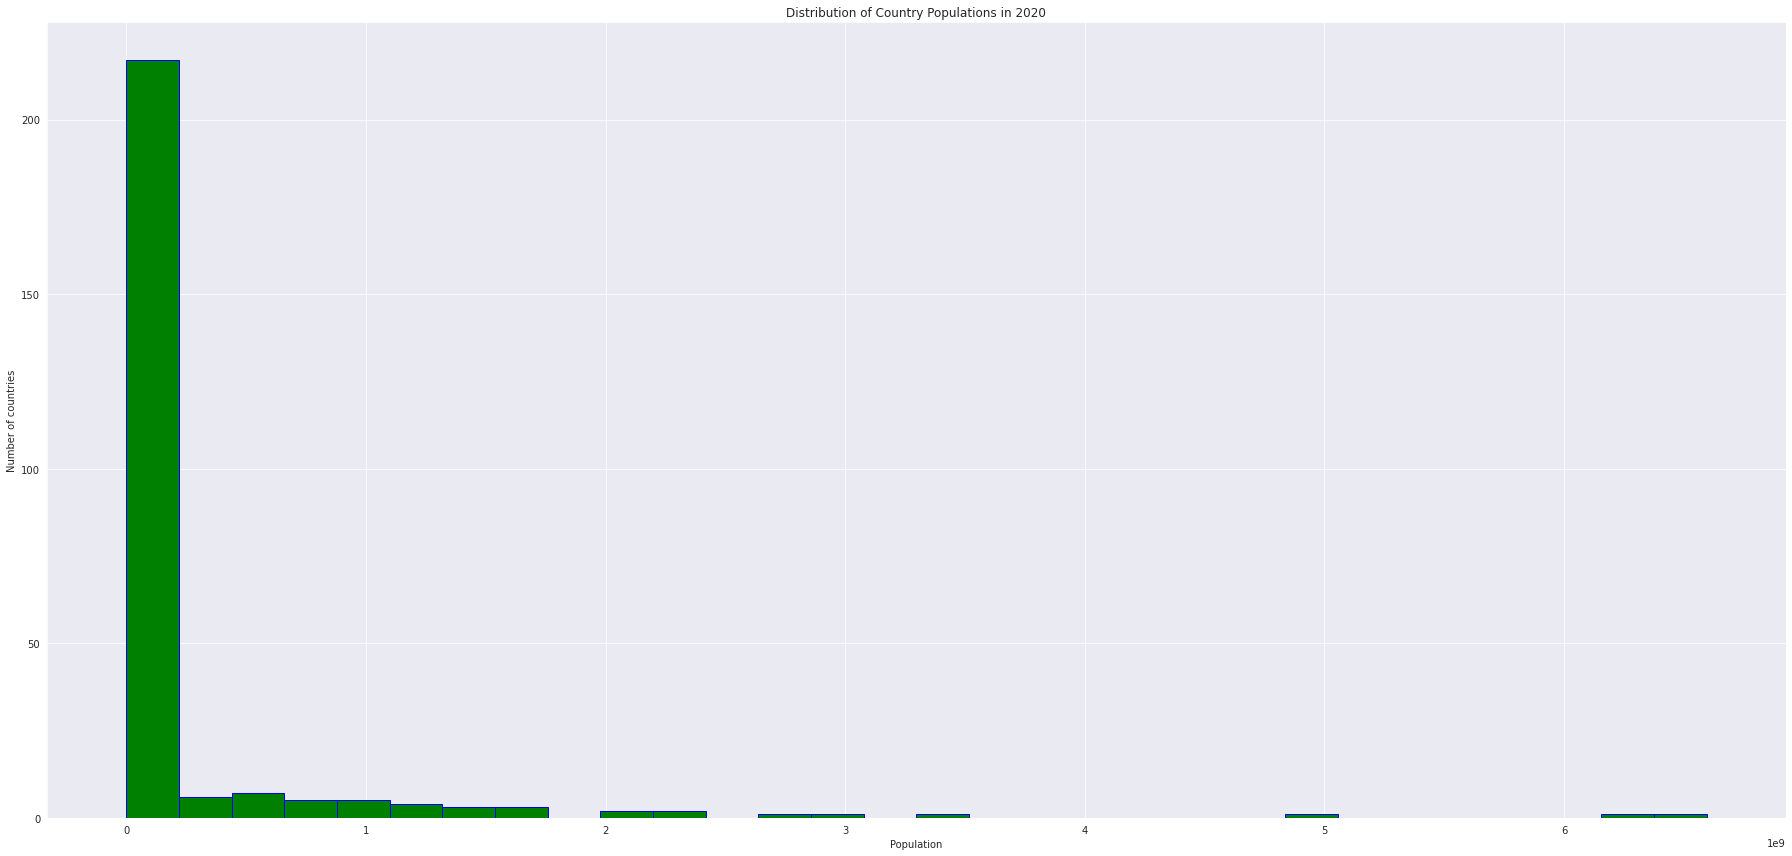

In [41]:
plt.figure(figsize = (25,12))
plt.hist(df_2020["Population"], bins=30, color="green", edgecolor="blue")
plt.title("Distribution of Country Populations in 2020")
plt.xlabel("Population")
plt.ylabel("Number of countries")
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
plt.savefig("population_distribution_2020.png")

<Figure size 432x288 with 0 Axes>

In [4]:
sns.set_palette("husl")

In [5]:
np.random.seed(42)
age_groups = ['0-14', '15-29', '30-44', '45-59', '60-74', '75+']
age_populations = [180000, 220000, 190000, 150000, 100000, 60000]

gender_labels = ['Male', 'Female']
gender_populations = [485000, 515000]
ages = []
for i, group in enumerate(age_groups):
    if group == '0-14':
        ages.extend(np.random.randint(0, 15, age_populations[i]//100))
    elif group == '15-29':
        ages.extend(np.random.randint(15, 30, age_populations[i]//100))
    elif group == '30-44':
        ages.extend(np.random.randint(30, 45, age_populations[i]//100))
    elif group == '45-59':
        ages.extend(np.random.randint(45, 60, age_populations[i]//100))
    elif group == '60-74':
        ages.extend(np.random.randint(60, 75, age_populations[i]//100))
    else:  # 75+
        ages.extend(np.random.randint(75, 100, age_populations[i]//100))

ages = np.array(ages)

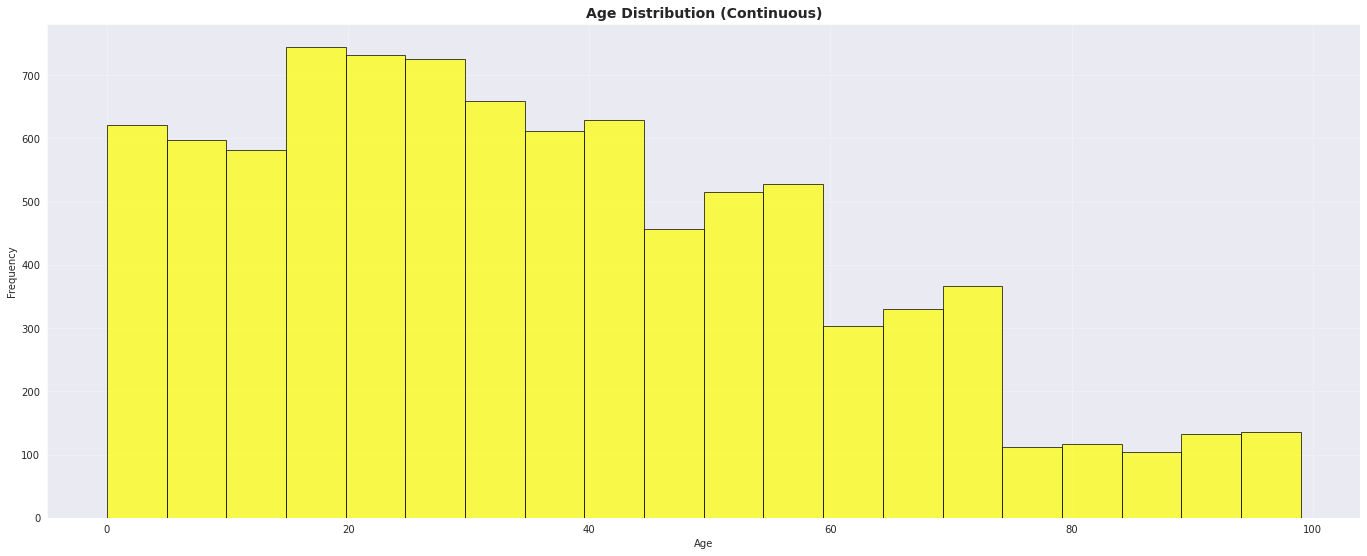

In [14]:
fig = plt.figure(figsize=(80, 20))
# 1. Age Distribution Histogram
plt.subplot(2, 3, 1)
plt.hist(ages, bins=20, color='yellow', edgecolor='black', alpha=0.7)
plt.title('Age Distribution (Continuous)', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

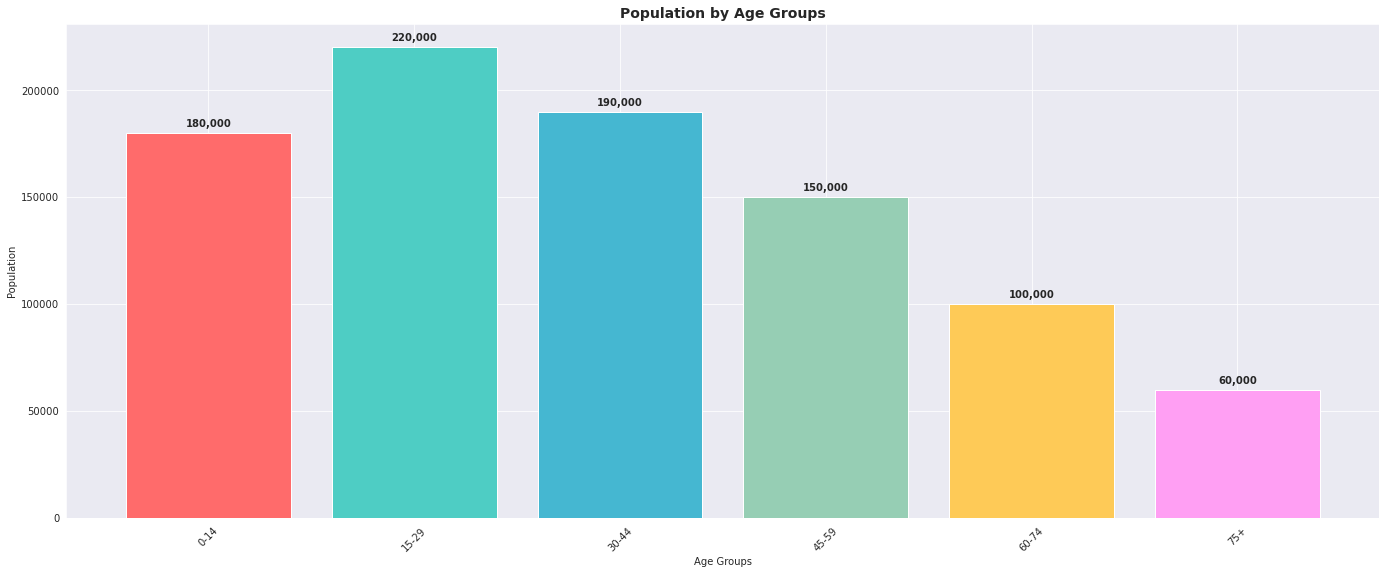

In [16]:
# 2. Age Groups Bar Chart
fig = plt.figure(figsize=(80, 20))
plt.subplot(2, 3, 2)
bars = plt.bar(age_groups, age_populations, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3'])
plt.title('Population by Age Groups', fontsize=14, fontweight='bold')
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.xticks(rotation=45)
for bar, value in zip(bars, age_populations):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2000,
             f'{value:,}', ha='center', va='bottom', fontweight='bold')

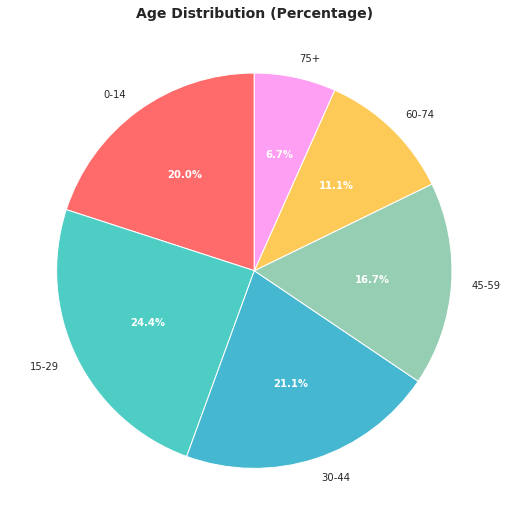

In [19]:
# 3. Age Groups Pie Chart

fig = plt.figure(figsize=(80, 20))
plt.subplot(2, 3, 3)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']
wedges, texts, autotexts = plt.pie(age_populations, labels=age_groups, autopct='%1.1f%%',
                                   colors=colors, startangle=90)
plt.title('Age Distribution (Percentage)', fontsize=14, fontweight='bold')
# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')


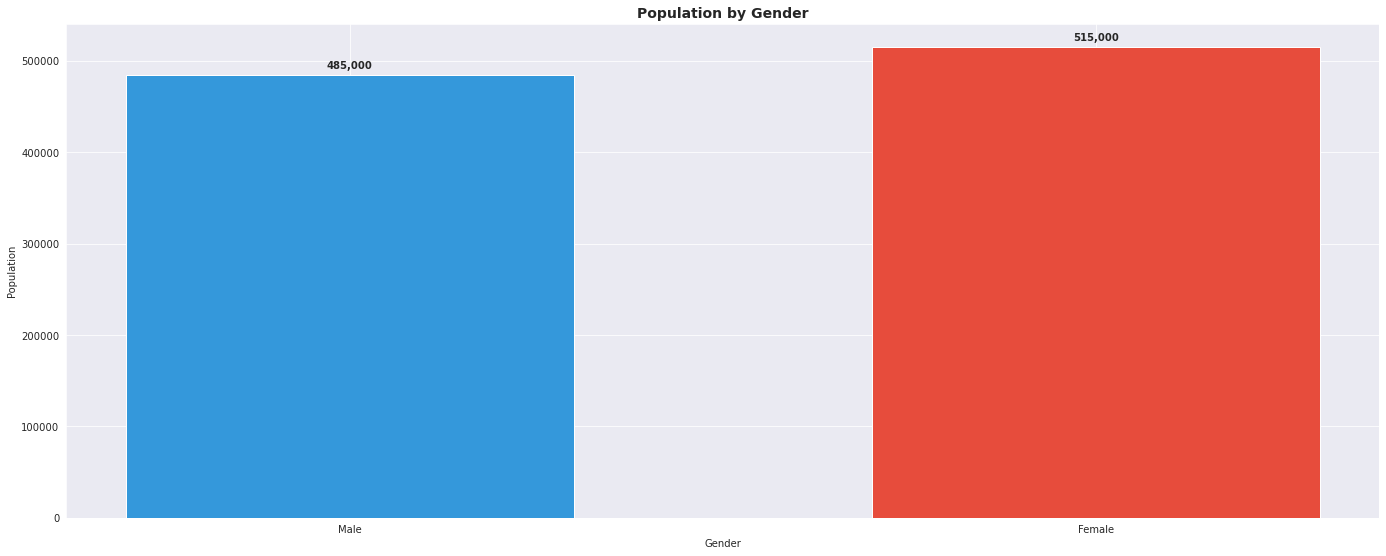

In [21]:
# 4. Gender Distribution Bar Chart
fig = plt.figure(figsize=(80, 20))
plt.subplot(2, 3, 4)
bars = plt.bar(gender_labels, gender_populations, color=['#3498db', '#e74c3c'], width=0.6)
plt.title('Population by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Population')
# Add value labels
for bar, value in zip(bars, gender_populations):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
             f'{value:,}', ha='center', va='bottom', fontweight='bold')

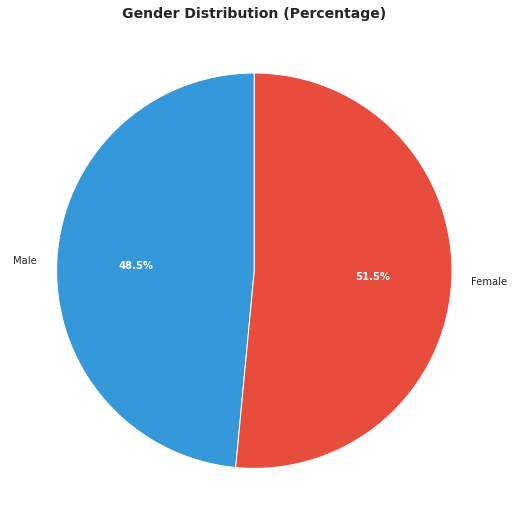

In [23]:
fig = plt.figure(figsize=(80, 20))
plt.subplot(2, 3, 5)
wedges, texts, autotexts = plt.pie(gender_populations, labels=gender_labels, autopct='%1.1f%%',
                                   colors=['#3498db', '#e74c3c'], startangle=90)
plt.title('Gender Distribution (Percentage)', fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

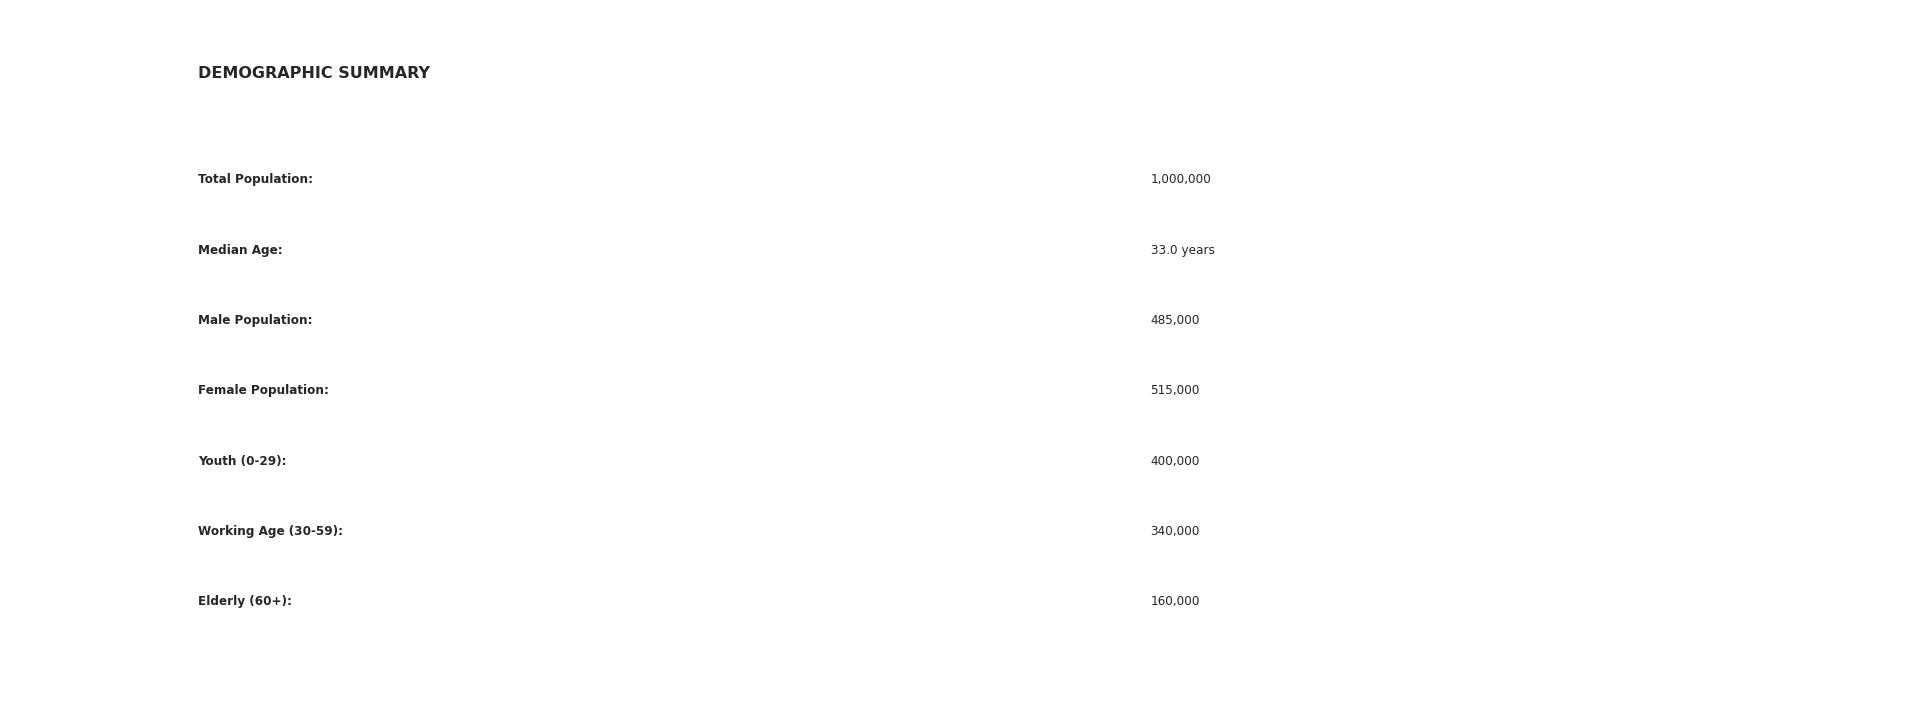

In [25]:
# 6. Combined Demographics Summary
fig = plt.figure(figsize=(80, 20))
plt.subplot(2, 3, 6)
# Create a summary table visualization
summary_data = {
    'Category': ['Total Population', 'Median Age', 'Male Population', 'Female Population',
                 'Youth (0-29)', 'Working Age (30-59)', 'Elderly (60+)'],
    'Value': [f'{sum(gender_populations):,}', f'{np.median(ages):.1f} years',
              f'{gender_populations[0]:,}', f'{gender_populations[1]:,}',
              f'{sum(age_populations[:2]):,}', f'{sum(age_populations[2:4]):,}',
              f'{sum(age_populations[4:]):,}']
}

# Create text-based summary
plt.text(0.1, 0.9, 'DEMOGRAPHIC SUMMARY', fontsize=16, fontweight='bold',
         transform=plt.gca().transAxes)
y_pos = 0.75
for category, value in zip(summary_data['Category'], summary_data['Value']):
    plt.text(0.1, y_pos, f'{category}:', fontsize=12, fontweight='bold',
             transform=plt.gca().transAxes)
    plt.text(0.6, y_pos, value, fontsize=12,
             transform=plt.gca().transAxes)
    y_pos -= 0.1

plt.axis('off')

plt.tight_layout()
plt.savefig('demographic_analysis_complete.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
# Additional Analysis: Dependency Ratio
youth_dependency = (age_populations[0] / sum(age_populations[2:4])) * 100
elderly_dependency = (sum(age_populations[4:]) / sum(age_populations[2:4])) * 100
total_dependency = youth_dependency + elderly_dependency

print("="*50)
print("DEMOGRAPHIC ANALYSIS RESULTS")
print("="*50)
print(f"Total Population: {sum(gender_populations):,}")
print(f"Male Population: {gender_populations[0]:,} ({gender_populations[0]/sum(gender_populations)*100:.1f}%)")
print(f"Female Population: {gender_populations[1]:,} ({gender_populations[1]/sum(gender_populations)*100:.1f}%)")
print(f"Median Age: {np.median(ages):.1f} years")
print(f"Mean Age: {np.mean(ages):.1f} years")
print("\nAGE GROUP BREAKDOWN:")
for group, pop in zip(age_groups, age_populations):
    percentage = (pop / sum(age_populations)) * 100
    print(f"{group}: {pop:,} ({percentage:.1f}%)")

print(f"\nDEPENDENCY RATIOS:")
print(f"Youth Dependency Ratio: {youth_dependency:.1f}%")
print(f"Elderly Dependency Ratio: {elderly_dependency:.1f}%")
print(f"Total Dependency Ratio: {total_dependency:.1f}%")
print("="*50)

DEMOGRAPHIC ANALYSIS RESULTS
Total Population: 1,000,000
Male Population: 485,000 (48.5%)
Female Population: 515,000 (51.5%)
Median Age: 33.0 years
Mean Age: 36.6 years

AGE GROUP BREAKDOWN:
0-14: 180,000 (20.0%)
15-29: 220,000 (24.4%)
30-44: 190,000 (21.1%)
45-59: 150,000 (16.7%)
60-74: 100,000 (11.1%)
75+: 60,000 (6.7%)

DEPENDENCY RATIOS:
Youth Dependency Ratio: 52.9%
Elderly Dependency Ratio: 47.1%
Total Dependency Ratio: 100.0%
